# Introduction

As a teacher at a small Christian Academy I wanted to take a look at how our school initiative of implementing standards based learning and grading (SPL/SPG) is going and if there are any trends that are starting to develop.  We began this initiative during the 2020-2021 school year which was also during the COVID-19 pandemic.  As a small school we were able to implement procedures that allowed us to offer in-person schooling (half-days) during that year, though it should be noted that the pandemic still had an effect on our students.

I received permission from my administration to download the grades from our student learning management system, RenWeb, to proceed with this project.  The school began using RenWeb in the 2015-2016 school year so I have grades spanning 2015-2023, but only first semesters grades in 2022-2023 as I completed this project during second semester.

Student names were deleted from the files before importing the data to maintain student anonymity.  RenWeb generates a student id which was kept as it is not used elsewhere to distinguish between individuals.  I also created a new spreadsheet that listed every course, teacher, and whether that course was taught with standards dating back to 2015.  I surveyed all teachers about when each of their classes transitioned to standards for accuracy.  In this sheet I also generated a unique teacher id for each teacher so that their names could be deleted.  Because I wanted to maintain anonymity, I went back to the student data and manually added the teacher id (and deleted teacher names) before importing.

Some additional cleaning steps that were done prior to importing data were:
1. Deleting all study halls, late arrivals, early release, chapels, family groups, and work experience courses that students were enrolled in as these did not have any academic grades.
2. Elective courses that were only taught one or two years, not currently being taught, and were not taught with standards were deleted.
3. Music classes were deleted as they are performance based, not academically based, and are not taught with standards.
4. Students who were missing Class Of (year graduated) information were manually updated based upon student knowledge and/or the sequence of classes they took in specific years.

Questions I wanted to answer:
1. Has the switch to SBL/SBG made a difference in students grades overall?
2. Has the switch to SBG made a difference in specific types of classes more than others?
3. Have classes been doing better the longer they have been doing SBL/SBG?

# Exploration and Data Cleaning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [5]:
#Combine all years together
year_1 = pd.read_csv('Original Data/Year1.csv')
year_2 = pd.read_csv('Original Data/Year2.csv')
year_3 = pd.read_csv('Original Data/Year3.csv')
year_4 = pd.read_csv('Original Data/Year4.csv')
year_5 = pd.read_csv('Original Data/Year5.csv')
year_6 = pd.read_csv('Original Data/Year6.csv')
year_7 = pd.read_csv('Original Data/Year7.csv')
year_8 = pd.read_csv('Original Data/Year8.csv')
combined = [year_1, year_2, year_3, year_4, year_5, year_6, year_7, year_8]
allyears = pd.concat(combined)
allyears.to_csv('allyears.csv')
print("All Years Data Combined")
allyears.head()

All Years Data Combined


,Student ID,Status,Class Of,Gender,Ethnicity,Language,Birth date,Course Title,Class Name,TEACHERID,ClassID,S1 Grade,S1 Avg,S1 GPA,S1 Passing,S2 Grade,S2 Avg,S2 GPA,S2 Passing,Year
0,10126.0,Graduate,2017.0,Female,Caucasian,English,8/31/1999,Bible III,BIB lll,90.0,33.0,NaN,0.0,0.0,False,B+,89.0,3.0,True,2015-2016
1,10141.0,Graduate,2016.0,Male,NaN,NaN,11/29/1997,Bible IV,BIB lV,90.0,34.0,A-,0.0,4.0,True,A-,90.0,4.0,True,2015-2016
2,10141.0,Graduate,2016.0,Male,NaN,NaN,11/29/1997,U. S. Government,US GVT,90.0,52.0,B+,0.0,3.0,True,NaN,0.0,0.0,False,2015-2016
3,10170.0,Graduate,2018.0,Male,Caucasian,English,2/28/2000,Bible II,BIB ll,90.0,32.0,C,0.0,2.0,True,NaN,0.0,0.0,False,2015-2016
4,10170.0,Graduate,2018.0,Male,Caucasian,English,2/28/2000,World History,WR HIS,90.0,35.0,D,0.0,1.0,True,C-,72.0,2.0,True,2015-2016


In [6]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6315 entries, 0 to 1030
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student ID    6270 non-null   float64
 1   Status        6270 non-null   object 
 2   Class Of      6270 non-null   float64
 3   Gender        6270 non-null   object 
 4   Ethnicity     3815 non-null   object 
 5   Language      5160 non-null   object 
 6   Birth date    6270 non-null   object 
 7   Course Title  6270 non-null   object 
 8   Class Name    6270 non-null   object 
 9   TEACHERID     6270 non-null   float64
 10  ClassID       6270 non-null   float64
 11  S1 Grade      5664 non-null   object 
 12  S1 Avg        6247 non-null   float64
 13  S1 GPA        6264 non-null   float64
 14  S1 Passing    6265 non-null   object 
 15  S2 Grade      4708 non-null   object 
 16  S2 Avg        5229 non-null   float64
 17  S2 GPA        5212 non-null   float64
 18  S2 Passing    5213 non-null 

Take a deeper look at the Language and Ethnicity columns as there are a significant amount of null values.

In [7]:
SELECT DISTINCT(Language), COUNT(*) AS "Total Count", COUNT(DISTINCT "Student ID") AS "Student Count"
FROM allyears.csv
GROUP BY Language;

,Language,Total Count,Student Count
0,English,4534,244
1,NaN,1155,118
2,Spanish,542,30
3,Chinese,23,2
4,Vietnamese,18,1
5,Hebrew,17,1
6,Russian,26,2


In [8]:
SELECT DISTINCT(Ethnicity), COUNT(*) AS "Total Count", COUNT(DISTINCT "Student ID") AS "Student Count"
FROM allyears.csv
GROUP BY Ethnicity;

,Ethnicity,Total Count,Student Count
0,Caucasian,420,22
1,NaN,2500,171
2,Non-Hispanic/Latino,1951,120
3,Asian/Pacific Islander,39,2
4,Hispanic,18,1
5,Hispanic/Latino,1209,68
6,Asian/Pacific Island,178,14


In [9]:
print('Number of students speaking each language')
df4

Number of students speaking each language


,Language,Total Count,Student Count
0,English,4534,244
1,NaN,1155,118
2,Spanish,542,30
3,Chinese,23,2
4,Vietnamese,18,1
5,Hebrew,17,1
6,Russian,26,2


In [10]:
print('Number of students of each enthnicity')
df5

Number of students of each enthnicity


,Ethnicity,Total Count,Student Count
0,Caucasian,420,22
1,NaN,2500,171
2,Non-Hispanic/Latino,1951,120
3,Asian/Pacific Islander,39,2
4,Hispanic,18,1
5,Hispanic/Latino,1209,68
6,Asian/Pacific Island,178,14


## Cleaning Steps

A summary of the cleaning steps taken:
1. Drop the Language, Ethnicity, S1 Passing, and S2 Passing columns. The Language column only had 10% of data that were either non-null or non-English speaking. The Ethnicity column had almost 40% of null data entries.  In both cases, there is not enough information to keep the data.
2. Change the column titles so that there are not spaces between words.
3. S1/S2 grades that were incomplete, passing, withdrawn, not complete, and withdrawn passing were changed to null.
4. There were data entries that have either S1 or S2 grade as null, but S1/S2 Avg and Percent as zero.  This will skew the averages of these data in the future, so the zero values where changed to null in these cases.
5. Some entries had a GPA/Grade but not an Avg.  I used our schools Grade/Avg converter to change those zero scores to an apporpriate avgerage for the grade/gpa.
6. After the above changes, some students no longer had scores for S1 & S2 of a class.  These entries were dropped.
7. A student was dropped from the entries as they were only enrolled for 5 weeks.
        -Droping from steps 6 & 7 resulted in a loss of just under 2% of the data.
8. Change the data type of StudentID, Class_Of and TeacherID to int.
9. Changing how two classes were referred to so that the would match the classes csv for merging.

In [11]:
allyears = pd.read_csv('allyears.csv')
classes = pd.read_csv('Classes2.csv')

# Drop columns
allyears = allyears.drop(['Unnamed: 0', 'Language', 'Ethnicity', 'S1 Passing', 'S2 Passing', 'ClassID'], axis = 1)

#Rename columns so there are no spaces
allyears = allyears.rename(columns={'Student ID': 'StudentID', 'Class Of': 'Class_Of', 'Birth date': 'Birthdate', 'Course Title': 'Course_Title', 'Class Name': 'Class_Name', 'TEACHERID': 'TeacherID', 'S1 Grade': 'S1_Grade', 'S1 Avg': 'S1_Avg', 'S1 GPA': 'S1_GPA', 'S1 Passing': 'S1_Passing', 'S2 Grade': 'S2_Grade', 'S2 Avg': 'S2_Avg', 'S2 GPA': 'S2_GPA', 'S2 Passing': 'S2_Passing'})

# replace 'AU', 'I', 'P', 'W', 'NC', 'WP' in S1_Grade and S2_Grade with null
allyears['S1_Grade'].replace(['AU', 'I', 'P', 'W', 'NC', 'WP', 'WF'], inplace=True, value=None)
allyears['S2_Grade'].replace(['AU', 'I', 'P', 'W', 'NC', 'WP', 'WF'], inplace=True, value=None)

#Changing Avg/GPA 0 scores to null if Grade scores are 0 (so it doesn't effect average)
allyears.loc[allyears['S1_Grade'].isnull(), ['S1_Avg', 'S1_GPA']] = np.nan
allyears.loc[allyears['S2_Grade'].isnull(), ['S2_Avg', 'S2_GPA']] = np.nan

#Cleaning grade info: for entires that have a value on 4.0 scale but not an average, imput in a corresponding %
gpa_to_avg = {5: 96, 4: 96, 3.7: 91, 3.3: 88, 3: 85, 2.7: 82, 2.3: 78, 2: 75, 1.7: 72, 1.3: 68, 1: 60}
for gpa, avg in gpa_to_avg.items():
    allyears.loc[(allyears['S1_GPA']==gpa) & (allyears['S1_Avg'].isnull()), 'S1_Avg'] = avg
    allyears.loc[(allyears['S2_GPA']==gpa) & (allyears['S2_Avg'].isnull()), 'S2_Avg'] = avg
    allyears.loc[(allyears['S1_GPA']==gpa) & (allyears['S1_Avg']==0), 'S1_Avg'] = avg
    allyears.loc[(allyears['S2_GPA']==gpa) & (allyears['S2_Avg']==0), 'S2_Avg'] = avg
grade_to_avg = {'A': 96, 'A-': 91, 'B+':88, 'B':85, 'B-': 82, 'C+':78, 'C': 75, 'C-':72, 'D+':68, 'D':65, 'D-': 60, 'F': 25}
for grade, avg in grade_to_avg.items():
    allyears.loc[(allyears['S1_Grade']==grade) & (allyears['S1_Avg'].isnull()), 'S1_Avg'] = avg
    allyears.loc[(allyears['S2_Grade']==grade) & (allyears['S2_Avg'].isnull()), 'S2_Avg'] = avg
    allyears.loc[(allyears['S1_Grade']==grade) & (allyears['S1_Avg']==0), 'S1_Avg'] = avg
    allyears.loc[(allyears['S2_Grade']==grade) & (allyears['S2_Avg']==0), 'S2_Avg'] = avg

#Delete rows that have both S1 & S2 averages as null
allyears.loc[(allyears['S1_GPA']==0) & (allyears['S1_Avg'].isnull()), 'S1_GPA'].isnull()
allyears.loc[(allyears['S2_GPA']==0) & (allyears['S2_Avg'].isnull()), 'S2_GPA'].isnull()
allyears = allyears.dropna(subset=['S1_Avg', 'S2_Avg'], how = 'all')

#Remove a student who only was enrolled 5 weeks.
allyears = allyears[allyears.StudentID != 10586]

#Making columns match classes2 for merging
allyears['Class_Name'] = allyears['Class_Name'].replace({'AP Calc':'AP CALCULUS','PROD':'FLM PROD'})

#Changing type from float to int
allyears[['StudentID', 'Class_Of', 'TeacherID']] = allyears[['StudentID', 'Class_Of', 'TeacherID']].astype(int)

#Update table
allyears.to_csv('allyears.csv')
print("All years data after cleaning")
allyears.head()

All years data after cleaning


,StudentID,Status,Class_Of,Gender,Birthdate,Course_Title,Class_Name,TeacherID,S1_Grade,S1_Avg,S1_GPA,S2_Grade,S2_Avg,S2_GPA,Year
0,10126,Graduate,2017,Female,8/31/1999,Bible III,BIB lll,90,NaN,NaN,NaN,B+,89.0,3.0,2015-2016
1,10141,Graduate,2016,Male,11/29/1997,Bible IV,BIB lV,90,A-,96.0,4.0,A-,90.0,4.0,2015-2016
2,10141,Graduate,2016,Male,11/29/1997,U. S. Government,US GVT,90,B+,85.0,3.0,NaN,NaN,NaN,2015-2016
3,10170,Graduate,2018,Male,2/28/2000,Bible II,BIB ll,90,C,75.0,2.0,NaN,NaN,NaN,2015-2016
4,10170,Graduate,2018,Male,2/28/2000,World History,WR HIS,90,D,60.0,1.0,C-,72.0,2.0,2015-2016


In [12]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6151 entries, 0 to 6314
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StudentID     6151 non-null   int64  
 1   Status        6151 non-null   object 
 2   Class_Of      6151 non-null   int64  
 3   Gender        6151 non-null   object 
 4   Birthdate     6151 non-null   object 
 5   Course_Title  6151 non-null   object 
 6   Class_Name    6151 non-null   object 
 7   TeacherID     6151 non-null   int64  
 8   S1_Grade      5646 non-null   object 
 9   S1_Avg        5646 non-null   float64
 10  S1_GPA        5646 non-null   float64
 11  S2_Grade      4666 non-null   object 
 12  S2_Avg        4666 non-null   float64
 13  S2_GPA        4666 non-null   float64
 14  Year          6151 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 768.9+ KB


## Merging tables together

Merge allyear and classees to create RenWeb table.  

**Added columns:** 
1. Add on an average GPA and an average perecnt column for the average of the year.  
2. Add a grade column that states what grade level the student took the class in.
3. Add a year2 column that pulls apart the academic year (as a string) and has just the last year (as an int).

In [13]:
#merge allyears and classes together
ren_web = classes.merge(allyears, on= ['Course_Title', 'Class_Name', 'TeacherID', 'Year'], how = 'inner')

#Create Avg GPA and Avg Percent columns
ren_web['Avg_Percent'] = ren_web[['S1_Avg', 'S2_Avg']].mean(axis=1, skipna=True)
ren_web['Avg_GPA'] = ren_web[['S1_GPA', 'S2_GPA']].mean(axis=1, skipna=True)

#Create Grade column
def get_grade(row):
    year = int(row['Year'].split('-')[0])
    grade = row['Class_Of'] - year
    if grade == 4:
        return 'Freshman'
    elif grade == 3:
        return 'Sophomore'
    elif grade == 2:
        return 'Junior'
    elif grade == 1:
        return 'Senior'
    else:
        return 'unknown'
ren_web['Grade'] = ren_web.apply(get_grade, axis=1)

#Create a year column that has only one year
ren_web['year2'] = ren_web['Year'].apply(lambda x: int(x.split('-')[1]))

ren_web.to_csv('RenWeb.csv')
print('All years data combined with class information:\nWith creation of Grade column and year column')
ren_web.head()

All years data combined with class information:
With creation of Grade column and year column


,Course_Title,Class_Name,TeacherID,Year,Standards,Class_Type,StudentID,Status,Class_Of,Gender,Birthdate,S1_Grade,S1_Avg,S1_GPA,S2_Grade,S2_Avg,S2_GPA,Avg_Percent,Avg_GPA,Grade,year2
0,Adv. Film Production,ADV FILM PROD,2,2017-2018,No,Arts,10170,Graduate,2018,Male,02/28/2000,NaN,NaN,NaN,A,96.7,4.0,96.7,4.0,Senior,2018
1,Adv. Film Production,ADV FILM PROD,2,2017-2018,No,Arts,10149,Graduate,2018,Female,06/26/2000,NaN,NaN,NaN,A,100.0,4.0,100.0,4.0,Senior,2018
2,Adv. Film Production,ADV FILM PROD,2,2017-2018,No,Arts,10165,Graduate,2018,Male,05/08/2000,NaN,NaN,NaN,A,100.0,4.0,100.0,4.0,Senior,2018
3,Adv. Film Production,ADV FILM PROD,2,2017-2018,No,Arts,10176,Graduate,2018,Female,03/05/2000,NaN,NaN,NaN,A,96.7,4.0,96.7,4.0,Senior,2018
4,Adv. Film Production,ADV FILM PROD,2,2017-2018,No,Arts,10112,Graduate,2018,Female,02/03/1999,NaN,NaN,NaN,A,98.3,4.0,98.3,4.0,Senior,2018


Create dataframes that have infromation only for the classes that have transitioned to standards as well as for classes that have not transitioned to standards.  These will be used to compare average GPA between the classses.

In [14]:
# Filter the dataframe to only include classes without standards
no_standards = ren_web[ren_web['Standards'] == 'No']

# Get the unique class names from the filtered dataframe
class_names_no_standards = no_standards['Class_Name'].unique()

# Filter the dataframe to only include classes with standards
with_standards = ren_web[ren_web['Standards'] == 'Yes']

# Get the unique class names from the filtered dataframe
class_names_with_standards = with_standards['Class_Name'].unique()
class_with_standards = pd.DataFrame(class_names_with_standards, columns=['Class_Name'])

# Find the names of classes that have only had no standards
class_names_only_no_standards = set(class_names_no_standards).difference(class_names_with_standards)
class_no_standards = pd.DataFrame(class_names_only_no_standards, columns=['Class_Name'])

#Create separte dataframes for classes that have never had standards and classes that have had both
classes_no_standards = ren_web.merge(class_no_standards, on='Class_Name', how='inner')
classes_with_standards = ren_web.merge(class_with_standards, on = 'Class_Name', how = 'inner')

# Data Analysis & Visualization

## Has the switch to SBL/SBG made a difference in students grades overall?

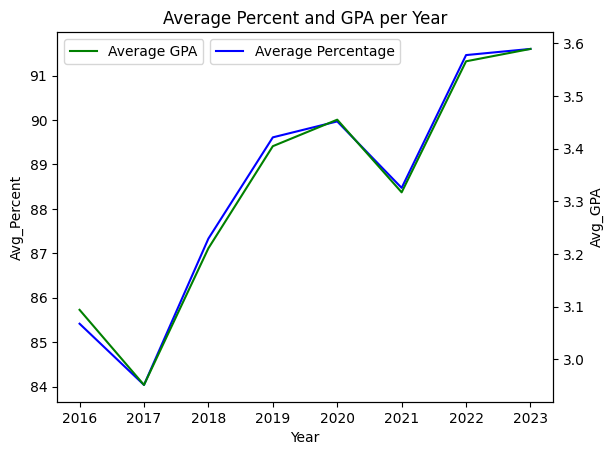

In [15]:
ax = sns.lineplot(data=ren_web, x='year2', y='Avg_Percent', color = 'b', errorbar=None, label = 'Average Percentage')
ax2 = ax.twinx()
sns.lineplot(data=ren_web, x='year2', y='Avg_GPA', ax=ax2, color = 'g', errorbar=None, label = 'Average GPA')
ax.legend(loc = 'upper center')
ax2.legend()
ax.set_xlabel('Year')
plt.title('Average Percent and GPA per Year')
plt.show()

In [16]:
--Percentages of Classes when using and not using SBG
SELECT 	ROUND(AVG(CASE WHEN Standards = 'No' THEN Avg_Percent END), 2) AS "Non-SBG Classes Percent (All Years)",
	(SELECT ROUND(AVG(CASE WHEN Standards = 'No' THEN Avg_Percent END), 2)
	 FROM RenWeb.csv
	 WHERE year2 >= 2020) AS "Non-SBG Classes Percent (2020-2023)",
	ROUND(AVG(CASE WHEN Standards = 'Yes' THEN Avg_Percent END), 2) AS "SBG Classes Percent (2020-2023)"
FROM RenWeb.csv;

,Non-SBG Classes Percent (All Years),Non-SBG Classes Percent (2020-2023),SBG Classes Percent (2020-2023)
0,88.93,91.03,89.45


In [17]:
print('Percentages of Classes when using and not using SBG')
df3

Percentages of Classes when using and not using SBG


,Non-SBG Classes Percent (All Years),Non-SBG Classes Percent (2020-2023),SBG Classes Percent (2020-2023)
0,88.93,91.03,89.45


In [18]:
#Run an independet t-test to compare the means of the classes using SBG and classes not using SBG.
#Null hypothesis=there is no differenct between the means.
alpha = 0.05
print('Run a t-test to compare the means of all classes using SBG and classes not using SBG using an alpha value of', alpha)

no_standards = ren_web[ren_web['Standards'] == 'No']['Avg_Percent']
yes_standards = ren_web[ren_web['Standards'] == 'Yes']['Avg_Percent']

t_stat, p_val = ttest_ind(no_standards, yes_standards)
print("The p_val is", p_val, "and the t_stat is", t_stat)

if p_val < alpha:
    print("Reject null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis. There is no significant difference between the means.")

Run a t-test to compare the means of all classes using SBG and classes not using SBG using an alpha value of 0.05
The p_val is 0.13943333394341487 and the t_stat is -1.4780958838401361
Fail to reject null hypothesis. There is no significant difference between the means.


In [19]:
#Run an independet t-test to compare the means of the classes that have used SBG and classes that have never used SBG.
#Null hypothesis=there is no differenct between the means.
print('Run a t-test to compare the means of classes that have used SBG and classes that have never used SBG using an alpha value of', alpha)

no_standards = classes_no_standards['Avg_Percent']
yes_standards = classes_with_standards['Avg_Percent']

t_stat, p_val = ttest_ind(no_standards, yes_standards)
print("The p_val is", p_val)

alpha = 0.05

if p_val < alpha:
    print("Reject null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis. There is no significant difference between the means.")

Run a t-test to compare the means of classes that have used SBG and classes that have never used SBG using an alpha value of 0.05
The p_val is 2.5622725868248884e-40
Reject null hypothesis. There is a significant difference between the means.


In [20]:
#Number of classes per year with and without Standards
standardsnumber_pivot = pd.pivot_table(ren_web, values='Class_Name', index='Standards', columns='year2', aggfunc=pd.Series.nunique)
print("The number of classes using SBG each year")
standardsnumber_pivot

The number of classes using SBG each year


year2,2016,2017,2018,2019,2020,2021,2022,2023
Standards,,,,,,,,
No,35.0,34.0,39.0,42.0,44.0,27.0,24.0,15.0
Yes,NaN,NaN,NaN,NaN,1.0,17.0,23.0,28.0


In [21]:
#Avgerage Percent of classes per year with and without Standards
standardspercent_pivot = pd.pivot_table(ren_web, values='Avg_Percent', index='Standards', columns='year2', aggfunc='mean').round(2)
print('The average percent for classes each year with and without SBG')
standardspercent_pivot

The average percent for classes each year with and without SBG


year2,2016,2017,2018,2019,2020,2021,2022,2023
Standards,,,,,,,,
No,85.41,84.04,87.33,89.61,89.98,90.40,92.47,92.88
Yes,NaN,NaN,NaN,NaN,89.55,86.73,90.41,90.92


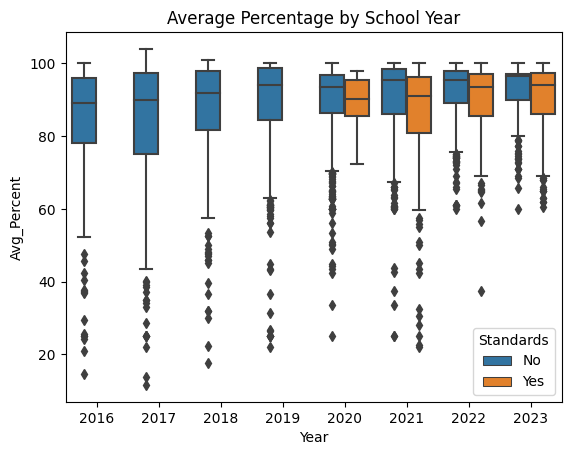

In [22]:
sns.boxplot(data=ren_web, x='year2', y='Avg_Percent', hue = 'Standards')
plt.title('Average Percentage by School Year')
plt.xlabel('Year')
plt.show()

In [23]:
--Number of F's in each type of class
SELECT Class_Type,
	COUNT(CASE WHEN Standards = 'No' THEN 1 END) AS "F's in Non-SBG classes",
	COUNT(CASE WHEN Standards = 'Yes' THEN 1 END) AS "F's in SBG classes"
FROM RenWeb.csv
WHERE S1_Grade = 'F' OR S2_Grade = 'F'
GROUP BY Class_Type

,Class_Type,F's in Non-SBG classes,F's in SBG classes
0,Math,40,5
1,Social Studies,20,3
2,Bible,7,5
3,Science,26,3
4,English,17,4
5,Arts,6,0
6,SEL,1,0
7,Language,0,1
8,PE,2,0


In [24]:
print("The number of F's in each class type")
df2

The number of F's in each class type


,Class_Type,F's in Non-SBG classes,F's in SBG classes
0,Math,40,5
1,Social Studies,20,3
2,Bible,7,5
3,Science,26,3
4,English,17,4
5,Arts,6,0
6,SEL,1,0
7,Language,0,1
8,PE,2,0


In [25]:
--Percentages in classes before and after SBG implementation
SELECT 	ROUND(AVG(CASE WHEN Standards = 'No' THEN Avg_Percent END), 2) AS "Percent Before SBG",
	ROUND(AVG(CASE WHEN Standards = 'Yes' THEN Avg_Percent END), 2) AS "Percent After SBG"
FROM classes_with_standards;

,Percent Before SBG,Percent After SBG
0,86.91,89.45


In [26]:
print("Percentages in classes before and after SBG implememntation")
df1

Percentages in classes before and after SBG implememntation


,Percent Before SBG,Percent After SBG
0,86.91,89.45


In [27]:
#Run an independet t-test to compare the means of the classes before and after SBG.
#Null hypothesis=there is no differenct between the means.
print('Run a t-test to compare the means of classes before and after SBG implentation using an alpha value of', alpha)

no_standards = classes_with_standards[classes_with_standards['Standards'] == 'No']['Avg_Percent']
yes_standards = classes_with_standards[classes_with_standards['Standards'] == 'Yes']['Avg_Percent']

t_stat, p_val = ttest_ind(no_standards, yes_standards)
print("The p_val is", p_val)

alpha = 0.05

if p_val < alpha:
    print("Reject null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis. There is no significant difference between the means.")

Run a t-test to compare the means of classes before and after SBG implentation using an alpha value of 0.05
The p_val is 2.9677862691536314e-10
Reject null hypothesis. There is a significant difference between the means.


**Has the switch to SBL/SBG made a difference in students grades overall?**

There has been an overall trend of the school's GPA and average percentage increasing over the years with a dip during the 2020-2021 school year.  This was the year when SBG was offically started being implemented at the school but it also was during COVID.  Is this dip due to SBG, to COVID, or some of both?

The switch to SBG has minimally increased the overall percentage comparing all years of data.  However when comparing just the years of data that SBG have been used, the non-SBG classes have a slightly higher percentage.  Is this happening just becuase the non-standards classes are 'easier'?  Has there been grade improvement in the classes that switched to standards?

**The effect of standards?** There has been a remarkable decrease in the number of F's given in SBG classes.  As the amount of classes using SBG has grown, so has the avgerage percent.  When looking only at the classes that switched to SBG, there has **been a stasticially significant increase** in percentage after making the switch.

## Has the switch made a difference in specific types of classes more than others?

In [28]:
#Percentage of class type with and without standards
classtype_pivot = pd.pivot_table(ren_web, values = 'Avg_Percent', index = ['Class_Type'], columns = 'Standards', aggfunc = 'mean').round(2)
print("Percentage by class type for all classes with and without SBG")
classtype_pivot

Percentage by class type for all classes with and without SBG


Standards,No,Yes
Class_Type,,
Arts,93.08,91.18
Bible,90.35,91.36
English,85.92,88.47
Language,91.52,92.89
Math,79.09,87.87
PE,96.21,97.53
SEL,94.24,94.34
Science,82.07,88.02
Social Studies,85.17,83.03


In [29]:
#Percentage of class type only for classes that have switched to SBG with and without standards
classtype_pivot2 = pd.pivot_table(classes_with_standards, values = 'Avg_Percent', index = ['Class_Type'], columns = 'Standards', aggfunc = 'mean').round(2)
print('Percentage by class type only for classes that have switched to SBG, before and after using SGG ')
classtype_pivot2

Percentage by class type only for classes that have switched to SBG, before and after using SGG 


Standards,No,Yes
Class_Type,,
Arts,90.77,91.18
Bible,87.91,91.36
English,85.34,88.47
Language,91.48,92.89
Math,78.49,87.87
PE,97.55,97.53
SEL,95.82,94.34
Science,81.38,88.02
Social Studies,82.94,83.03


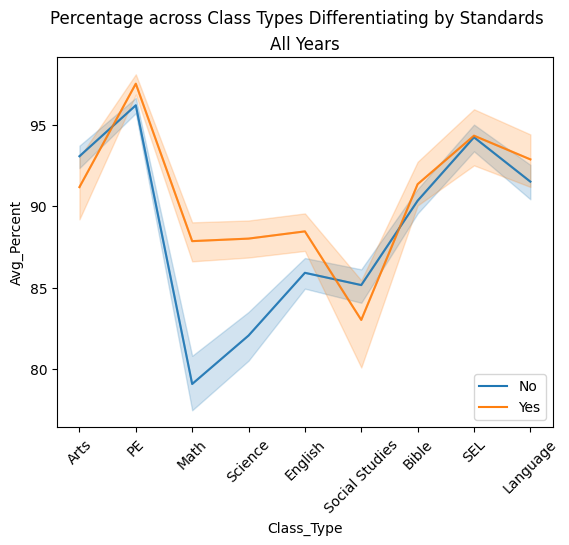

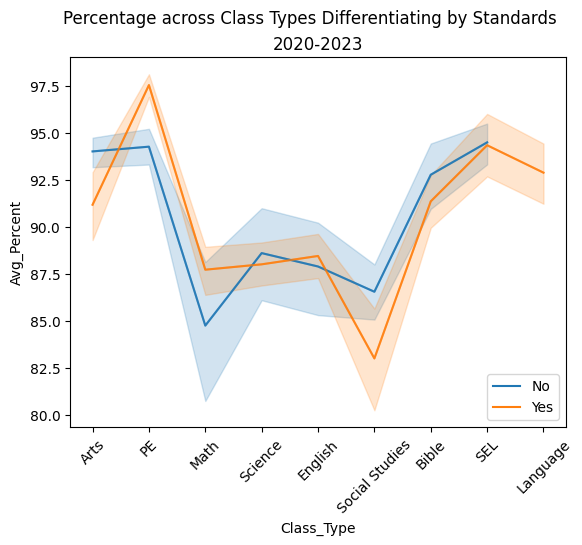

In [30]:
sns.lineplot(data=ren_web, x='Class_Type', y='Avg_Percent', color = 'b', alpha=0.9, hue = 'Standards', errorbar=None)
sns.lineplot(data=ren_web, x='Class_Type', y='Avg_Percent', color = 'b', alpha=0.3, hue = 'Standards', legend=None)
plt.suptitle('Percentage across Class Types Differentiating by Standards')
plt.title('All Years')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

sns.lineplot(data=ren_web[ren_web['Year'].isin(['2020-2021', '2021-2022', '2022-2023'])], x='Class_Type', y='Avg_Percent', color = 'b', alpha=0.9, hue = 'Standards', errorbar=None)
sns.lineplot(data=ren_web[ren_web['Year'].isin(['2020-2021', '2021-2022', '2022-2023'])], x='Class_Type', y='Avg_Percent', color = 'b', alpha=0.3, hue = 'Standards', legend=None)
plt.suptitle('Percentage across Class Types Differentiating by Standards')
plt.title('2020-2023')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

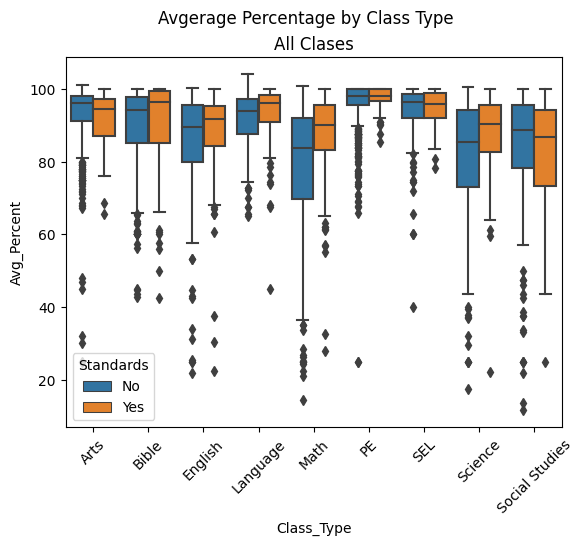

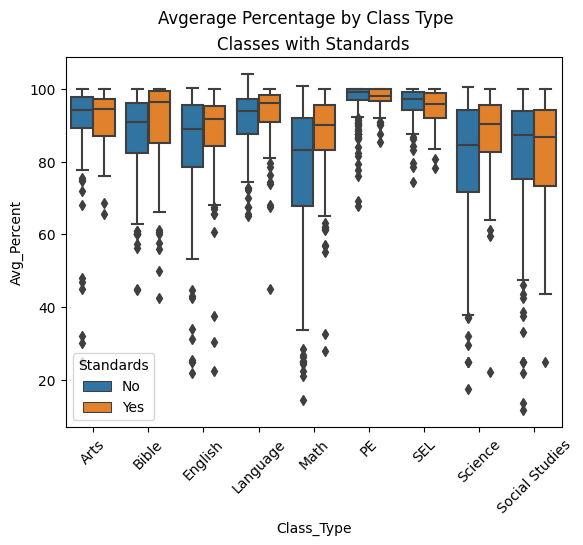

In [31]:
sns.boxplot(data=ren_web, x='Class_Type', y='Avg_Percent', hue = 'Standards', width=0.8, order = ['Arts', 'Bible', 'English', 'Language', 'Math', 'PE', 'SEL', 'Science', 'Social Studies'])
plt.suptitle('Avgerage Percentage by Class Type')
plt.title('All Clases')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=classes_with_standards, x='Class_Type', y='Avg_Percent', hue = 'Standards', width=0.8, order = ['Arts', 'Bible', 'English', 'Language', 'Math', 'PE', 'SEL', 'Science', 'Social Studies'])
plt.suptitle('Avgerage Percentage by Class Type')
plt.title('Classes with Standards')
plt.xticks(rotation=45)
plt.show()

In [32]:
--For the year 2022-2023
SELECT Class_Type, COUNT(DISTINCT Class_Name) AS " Number of Total Classes",
	COUNT(CASE WHEN Standards = 'Yes' THEN 'Class_Name' END) AS 'Students in SBG Classes',
	COUNT(CASE WHEN Standards = 'No' THEN 'Class_Name' END) AS 'Student in Non-SBG Classes'
FROM RenWeb.csv
WHERE year2 = '2023'
GROUP BY Class_Type;

,Class_Type,Number of Total Classes,Students in SBG Classes,Student in Non-SBG Classes
0,Arts,9,35,117
1,Math,5,106,2
2,Science,7,101,10
3,English,6,113,10
4,Social Studies,4,22,66
5,Bible,4,83,42
6,SEL,2,42,26
7,PE,4,72,48
8,Language,2,33,0


In [33]:
print("Metrics for the 2022-2023 school year")
df6

Metrics for the 2022-2023 school year


,Class_Type,Number of Total Classes,Students in SBG Classes,Student in Non-SBG Classes
0,Arts,9,35,117
1,Math,5,106,2
2,Science,7,101,10
3,English,6,113,10
4,Social Studies,4,22,66
5,Bible,4,83,42
6,SEL,2,42,26
7,PE,4,72,48
8,Language,2,33,0


In [34]:
#Percentage of class type only for classes that have not have switched to SBG
classtype_pivot3 = pd.pivot_table(classes_no_standards, values = 'Avg_Percent', index = ['Class_Type'], columns = 'year2', aggfunc = 'mean').round(2)
print("Percentage by class type only for classes that have not swited to SBG")
classtype_pivot3

Percentage by class type only for classes that have not swited to SBG


year2,2016,2017,2018,2019,2020,2021,2022,2023
Class_Type,,,,,,,,
Arts,90.18,91.25,93.94,99.30,92.98,97.50,93.50,93.75
Bible,91.11,94.18,92.11,92.98,96.04,90.89,95.12,98.10
English,88.32,92.79,86.92,92.97,86.50,91.47,91.31,89.33
Language,NaN,NaN,NaN,95.95,NaN,NaN,NaN,NaN
Math,85.83,NaN,89.07,89.72,82.38,86.84,82.76,84.50
PE,97.29,84.60,97.48,98.68,92.93,92.35,93.75,93.44
SEL,92.07,79.43,100.00,95.06,95.22,93.69,92.89,90.68
Science,NaN,91.67,79.80,92.40,89.58,93.95,NaN,89.96
Social Studies,87.47,76.50,93.39,88.73,87.74,76.44,87.79,93.47


**Has the switch made a difference in specific types of classes more than others?**
For classes that have made the switch to SBG, there has been an increase in percentage in almost every category, with Math and then Science classes having the most drastic change.

Additionally, these classes have tend to have a higher median, smaller IQR, and fewer outliers.

The majority of Arts and Social Studies classes are not yet SBG.  This should become an area of focus for the upcoming year.

## Have classes been doing better the longer they have been doing SBL/SBG?

In [35]:
#Percentage of each class type per year for classes that have switched to SBG
classstypeyear_pivot = pd.pivot_table(classes_with_standards[classes_with_standards['year2']>2020], values = 'Avg_Percent', index = 'Class_Type', columns = 'year2', aggfunc = 'mean').round(2)
print("Percentage by class type per year for classes that have switched to SBG")
classstypeyear_pivot

Percentage by class type per year for classes that have switched to SBG


year2,2021,2022,2023
Class_Type,,,
Arts,91.99,90.82,91.50
Bible,87.03,93.66,92.24
English,86.32,89.94,88.16
Language,90.10,93.68,95.12
Math,86.94,87.75,88.53
PE,94.73,97.52,97.88
SEL,97.19,97.64,94.34
Science,85.99,88.04,89.82
Social Studies,83.73,89.19,82.94


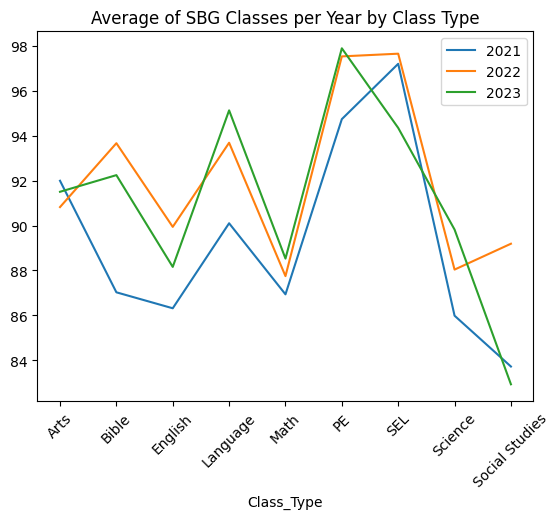

In [36]:
classstypeyear_pivot.plot()
plt.xticks(rotation=45)
plt.title('Average of SBG Classes per Year by Class Type')
plt.legend()
plt.show()

**Have classes been doing better the longer they have been doing SBL/SBG?**
Comparing 2021 to 2022, yes classes did better in second year using standards.  Nothing can be claimed about the third year the data is is only of the first semester.  While it looks like classes might do better thus far, it is too early to answer this question definitvly keeping in mind that this initative has only been done for two full years and not all classes are SBG.

# Conclusion

It appears that the switch to standards based grading has improved the scores of students on average.  For the classes that have switched to SBG there has been a noticable increage in average percentage.  This has been especially noticed in Math and Science classes. There has also been a reduction in failing grades.  Further data is needed to see if these trends will hold.  All classes will need to switch to SBG for the whole picture to be fully seen.

# Appendix (Other Data Visualizations)

In [37]:
#Percentage of each grade level per school year
classbyyear_pivot = pd.pivot_table(ren_web, values='Avg_Percent', index=['Class_Of'], columns='Grade', aggfunc='mean').round(2)
classbyyear_pivot = classbyyear_pivot[['Freshman', 'Sophomore', 'Junior', 'Senior']]
print("Percentage of each grade level per school year")
classbyyear_pivot

Percentage of each grade level per school year


Grade,Freshman,Sophomore,Junior,Senior
Class_Of,,,,
2016,NaN,NaN,NaN,88.23
2017,NaN,NaN,78.94,62.98
2018,NaN,82.25,82.91,90.85
2019,89.55,85.14,85.04,89.63
2020,87.44,82.70,88.17,89.70
2021,89.87,82.18,85.89,86.01
2022,93.41,89.60,87.42,90.96
2023,92.35,87.75,90.43,90.84
2024,92.16,91.28,88.10,NaN


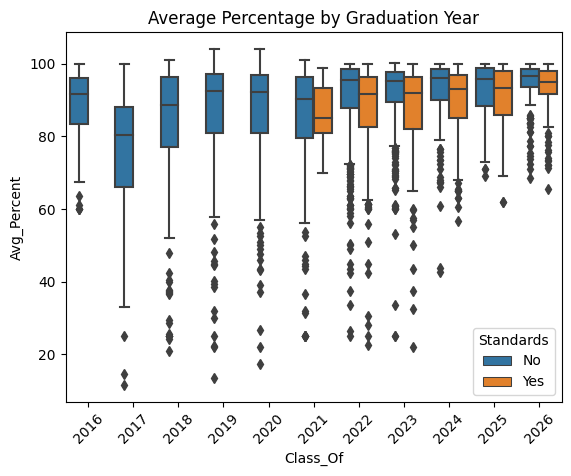

In [38]:
sns.boxplot(data=ren_web, x='Class_Of', y='Avg_Percent', hue = 'Standards')
plt.title('Average Percentage by Graduation Year')
plt.xticks(rotation=45)
plt.show()

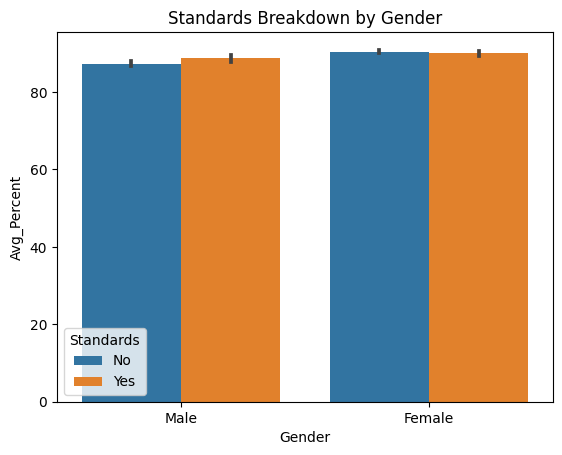

In [39]:
sns.barplot(data=ren_web, x='Gender', y='Avg_Percent', hue = 'Standards')
plt.title('Standards Breakdown by Gender')
plt.show()

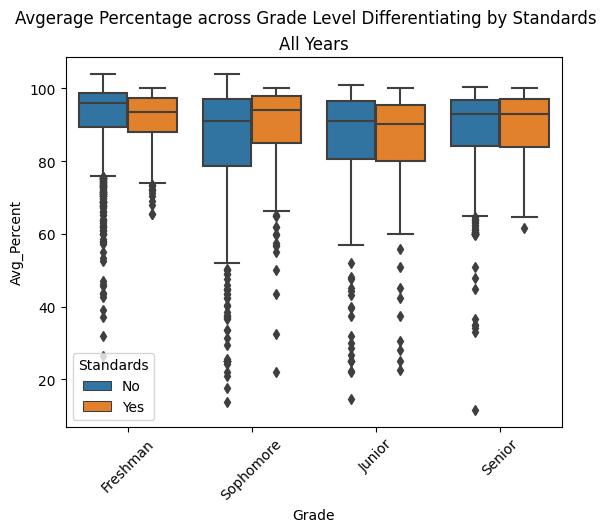

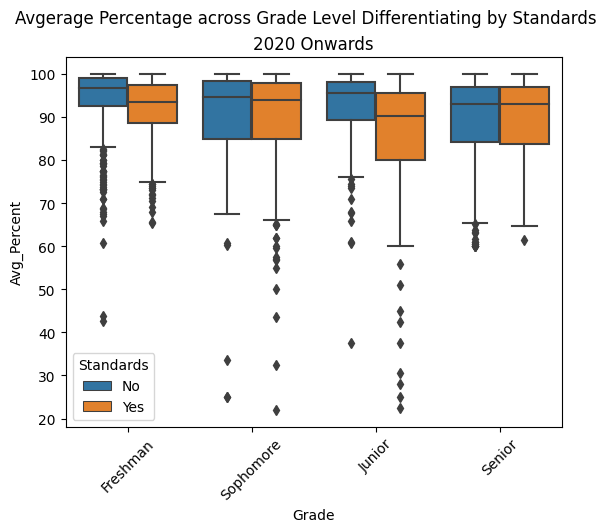

In [40]:
sns.boxplot(data=ren_web, x='Grade', y='Avg_Percent', hue = 'Standards',order = ['Freshman', 'Sophomore', 'Junior', 'Senior'])
plt.suptitle('Avgerage Percentage across Grade Level Differentiating by Standards')
plt.title('All Years')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=ren_web[ren_web['Year'].isin(['2020-2021', '2021-2022', '2022-2023'])], x='Grade', y='Avg_Percent', hue = 'Standards',order = ['Freshman', 'Sophomore', 'Junior', 'Senior'])
plt.suptitle('Avgerage Percentage across Grade Level Differentiating by Standards')
plt.title('2020 Onwards')
plt.xticks(rotation=45)
plt.show()

## Enrollment Data

In [41]:
--Number and percent of total student count of each enrollment status
SELECT Status, COUNT(DISTINCT StudentID) AS Number, ROUND(COUNT(DISTINCT StudentID)*100.0/(SELECT COUNT(DISTINCT StudentID) FROM RenWeb.csv), 2) AS Percent
FROM RenWeb.csv
GROUP BY Status;

,Status,Number,Percent
0,Graduate,163,41.48
1,Enrolled,126,32.06
2,Withdrawn,104,26.46


In [42]:
#Percentage of enrollment status with and without standards
status_pivot = np.round(pd.pivot_table(ren_web, values = 'Avg_Percent', index = ['Status'], columns = 'Standards', aggfunc = 'mean'), 2)
status_pivot

Standards,No,Yes
Status,,
Enrolled,93.07,90.42
Graduate,88.43,87.79
Withdrawn,86.28,86.16
